# Simple statistics

In [22]:
import random
num_friends = [random.randrange(101) for i in range(1000)]

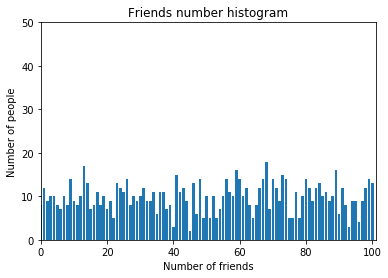

In [23]:

%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt
from collections import Counter

friend_counts = Counter(num_friends)
xs = range(101)
ys = [friend_counts[x] for x in xs]

plt.bar(xs, ys)
plt.axis([0, 101, 0, 50])
plt.title("Friends number histogram")
plt.xlabel("Number of friends")
plt.ylabel("Number of people")
plt.show()

In [29]:
print(len(num_friends))
print(min(num_friends))
print(max(num_friends))
sorted_values = sorted(num_friends)
print(sorted_values[0])
print(sorted_values[1])
print(sorted_values[-2])

1000
0
100
0
0
100


In [31]:
from __future__ import division

def mean(x):
    return sum(x) / len(x)

mean(num_friends)

50.576

# Median

In [34]:
def median(v):
    n = len(v)
    sorted_v = sorted(v)
    midpoint = n // 2
    
    if n % 2 == 1:
        return sorted_v[midpoint]
    else:
        return (sorted_v[midpoint-1] + sorted_v[midpoint]) / 2
    
median(num_friends)

52.0

# Calculate median without sorting
- https://en.wikipedia.org/wiki/Quickselect
- https://en.wikipedia.org/wiki/Floyd%E2%80%93Rivest_algorithm
- https://en.wikipedia.org/wiki/Median_of_medians
- https://en.wikipedia.org/wiki/Introselect


# Quantile

In [58]:
def quantile(x, p):
    if p >= 1:
        p_index = len(x) - 1
    else:
        p_index = int(p * len(x))
    return sorted(x)[p_index]

print(quantile(num_friends, 0.10))
print(quantile(num_friends, 0.25))
print(quantile(num_friends, 0.50))
print(quantile(num_friends, 0.75))
print(quantile(num_friends, 0.90))
print(quantile(num_friends, 1))

10
25
52
75
89
100


# Mode

In [60]:
# most frequent value
def mode(x):
    counts = Counter(x)
    max_count = max(counts.values())
    return [x_i for x_i, count in counts.items()
            if count == max_count]

mode(num_friends)

[68]

# Variation indicators

In [61]:
import math

def data_range(x):
    return max(x) - min(x)

def de_mean(x):
    x_mean = mean(x)
    return [x_i - x_mean for x_i in x]

def dot(v, w):
    return sum(v_i * w_i for v_i, w_i in zip(v, w))

def sum_of_squares(v):
    return dot(v, v)

# unbiased variance estimation
# len(x) >= 2
# https://en.wikipedia.org/wiki/Unbiased_estimation_of_standard_deviation
def variance(x):
    n = len(x)
    deviations = de_mean(x)
    return sum_of_squares(deviations) / (n - 1)

# sensitive to outliers as mean
def standard_deviation(x):
    return math.sqrt(variance(x))

# allows you to exclude the impact of a small number of outliers
def interquartile_range(x):
    return quantile(x, 0.75) - quantile(x, 0.25)

print("Data range: ", data_range(num_friends))
print("Variance: ", variance(num_friends))
print("Standard deviation: ", standard_deviation(num_friends))
print("Interquartile range: ", interquartile_range(num_friends))

Data range:  100
Variance:  850.5187427427462
Standard deviation:  29.163654481953152
Interquartile range:  50


# Correlation

In [73]:
daily_minutes = [x * random.randrange(5) for x in num_friends]

def covariance(x, y):
    n = len(x)
    return dot(de_mean(x), de_mean(y)) / (n - 1)

# from -1 (ideal anticorrelation) to 1 (ideal correlation)
def correlation(x, y):
    stdev_x = standard_deviation(x)
    stdev_y = standard_deviation(y)
    if stdev_x > 0 and stdev_y > 0:
        return covariance(x, y) / stdev_x / stdev_y
    else:
        return 0

print("Covariance: ", covariance(num_friends, daily_minutes))
print("Correlation: ", correlation(num_friends, daily_minutes))

Covariance:  1748.1323403403399
Correlation:  0.5872876560858165


### Correlation is very sensitive to outliers. Check data first.

In [78]:
# For example
outlier = num_friends.index(100)
num_friends_good = [x
                    for i, x in enumerate(num_friends)
                    if i != outlier]
daily_minutes_good = [x
                      for i, x in enumerate(daily_minutes)
                      if i != outlier]
print("Correlation: ", correlation(num_friends_good, daily_minutes_good))

Correlation:  0.5859504708919764


# The Simpson paradox

См. ссылки
- https://ru.wikipedia.org/wiki/Парадокс_Симпсона
- confounding variable

| Coast | Number of users | Average number of friends |
| ----- | ---------------- | -------------------------- |
| West | 101 | 8.2 |
| East | 103 | 6.2 |

But...

| Coast | Academic degree | Number of users | Average number of friends |
| ---  | --- |----| ---- |
| West | Yes | 35 | 3.1  |
| East | Yes | 70 | 3.2  |
| West | No  | 66 | 10.9 |
| East | No  | 33 | 13.4 |

Asymmetry in academic degree in East coast


# Correlation traps

In [84]:
x = [-2, -1, 0, 1, 2]
y = [2, 1, 0, 1, 2] # y_i = abs(x_i)
print("Correlation: ", correlation(x, y))

Correlation:  0.0


In [85]:
x = [-2, 1, 0, 1, 2]
y = [99.98, 99.99, 100, 100.01, 100.02]
print("Correlation: ", correlation(x, y))

Correlation:  0.8340576562281805


# Correlation and causal relationship

If $x$ and $y$ strongly correlated then $$x => y$$ $$or$$ $$y => x$$ $$or$$ $$x <=> y$$ $$or$$ $$z => x \space and  \space z => y$$ or nothing.

To check the causal relationship you need to conduct randomized experiments.

# For further study

- SciPy (https://docs.scipy.org/doc/scipy/reference/stats.html)
- Pandas (https://pandas.pydata.org/)
- StatModels (https://www.statsmodels.org/stable/index.html)